In [308]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [309]:
# load data, first at first 5 rows
data=pd.read_csv('model_test_data.csv')
data.head()

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,58.891377,5285.076955,8102.610429,-142802.4627,0.731818,61045.686450,183502.7911,2418498.392,27880.60083,360626.7592,4
1,57.641838,2094.137183,7432.119245,-147434.0657,2.527586,48485.220290,232809.7287,1779351.332,32153.75776,382670.3624,5
2,53.746536,5830.245294,6613.941822,-129496.5961,2.625691,36301.747910,214837.0432,2072100.771,30642.70182,370120.6062,2
3,36.168986,13039.246420,5270.829420,-439972.8126,0.844833,-5909.877785,173613.1204,1899841.158,41311.52728,329891.8986,4
4,32.669772,4611.755026,3456.822275,-138594.7123,4.058533,37602.705370,228498.4096,1925463.972,27522.27266,473752.7977,3


In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
y         10000 non-null float64
var_1     10000 non-null float64
var_2     10000 non-null float64
var_3     10000 non-null float64
var_4     10000 non-null float64
var_5     10000 non-null float64
var_6     10000 non-null float64
var_7     10000 non-null float64
var_8     10000 non-null float64
var_9     10000 non-null float64
var_10    10000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [311]:
# how many missing values?
data.isna().sum()

y         0
var_1     0
var_2     0
var_3     0
var_4     0
var_5     0
var_6     0
var_7     0
var_8     0
var_9     0
var_10    0
dtype: int64

# Exploratory Data Analysis
Reviewing the Data

In [312]:
pandas_profiling.ProfileReport(data)

In [313]:
data.describe()

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,12.190351,8445.963010,3450.252510,168505.815510,1.610510,73390.402240,85873.402570,1.150636e+06,22190.066240,153862.395490,3.032500
std,16.020137,3540.407793,2544.552718,154606.758685,0.799212,42488.751840,71600.020020,8.840513e+05,9835.270071,84665.459925,1.410901
min,-20.486397,-5583.153749,-6338.250221,-439972.812600,-1.328607,-77050.448580,-162312.422300,-2.692945e+06,-12674.425590,-135125.465700,1.000000
25%,0.342919,6012.666381,1689.792306,64840.482335,1.070263,44707.280773,37958.405845,5.353268e+05,15593.819880,96818.711418,2.000000
50%,10.881019,8463.373285,3430.595022,167029.781400,1.598712,73543.761555,86582.980525,1.149984e+06,22091.102400,154089.232450,3.000000
75%,23.047831,10864.843605,5165.408836,272343.174250,2.146489,102189.829900,133951.621325,1.742196e+06,28924.445840,211875.685575,4.000000
max,94.749833,23299.976630,12288.699000,857156.728100,4.639956,242913.447400,357758.526300,4.315470e+06,58807.189120,473752.797700,5.000000


In [314]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_analysis = data.drop([('y')], axis=1)
X_const = add_constant(vif_analysis)

pd.Series([variance_inflation_factor(X_const.values, i) 
               for i in range(X_const.shape[1])], 
              index=X_const.columns)


const     103.072651
var_1       5.823574
var_2       4.501668
var_3      19.650073
var_4       3.147491
var_5      13.307454
var_6       3.106804
var_7       6.023379
var_8       1.642826
var_9      17.073168
var_10      1.000899
dtype: float64

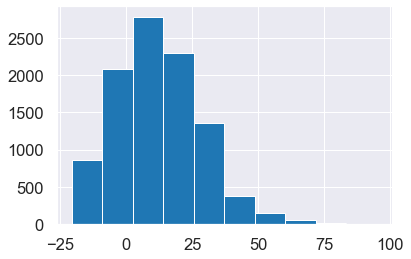

In [315]:
data['y'].hist()

In [316]:
data['var_10'].value_counts()

4    2086
5    2033
3    1989
2    1957
1    1935
Name: var_10, dtype: int64

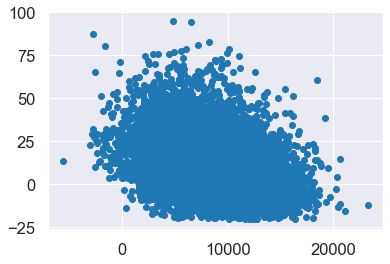

In [317]:
plt.scatter(data['var_1'],data['y'])

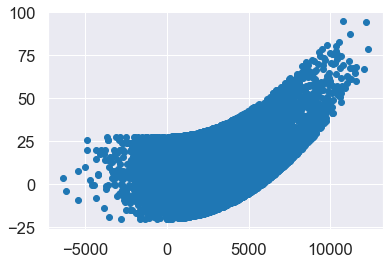

In [318]:
plt.scatter(data['var_2'],data['y'])

#### Parabolic Transformations
Used to linearize a non-linear or curvilinear relation

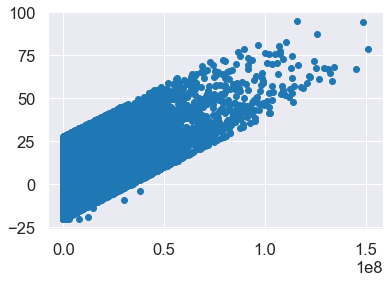

In [319]:
data['var_2_log'] = data['var_2']**2
plt.scatter(data['var_2_log'],data['y'])

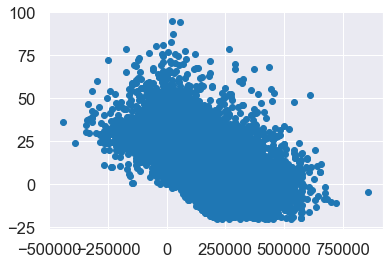

In [320]:
plt.scatter(data['var_3'],data['y'])

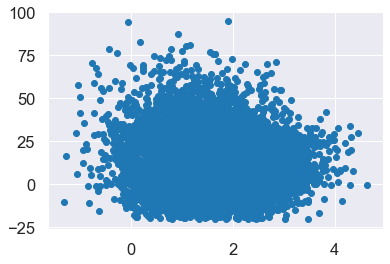

In [321]:
plt.scatter(data['var_4'],data['y'])

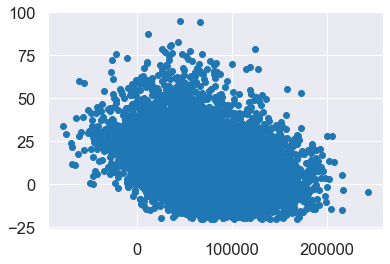

In [322]:
plt.scatter(data['var_5'],data['y'])

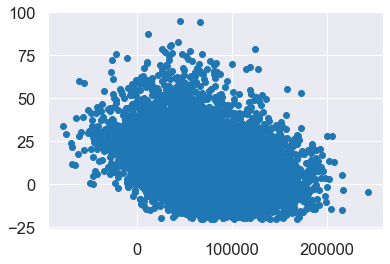

In [323]:
plt.scatter(data['var_5'],data['y'])

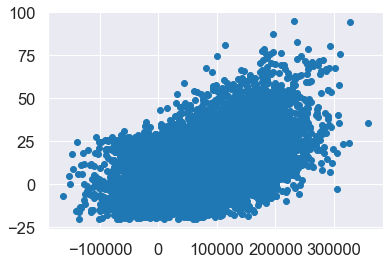

In [324]:
plt.scatter(data['var_6'],data['y'])

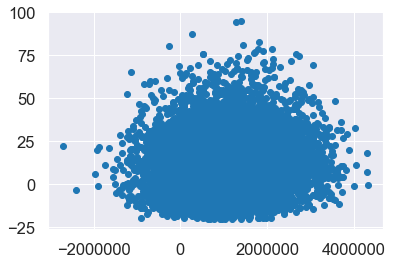

In [325]:
plt.scatter(data['var_7'],data['y'])

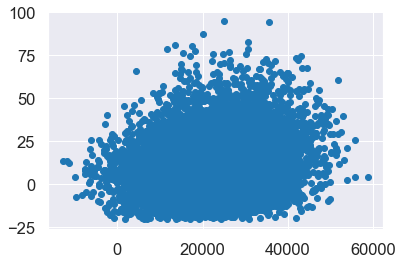

In [326]:
plt.scatter(data['var_8'],data['y'])

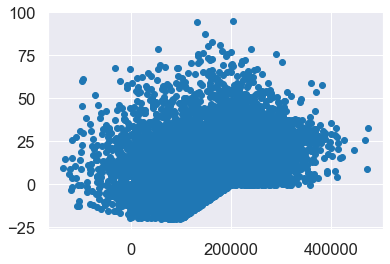

In [327]:
plt.scatter(data['var_9'],data['y'])

### Dependent Variable relationship with var 9 shows no value less than -.5 once crossing 210000 value

In [328]:
lower, higher = data['var_9'].min(), data['var_9'].max()
v9_test = data
v9_test['v9_bins']=pd.cut(v9_test['var_9'],[lower,100000,200000,205000,210000,220000,230000,300000,higher])
v9_test.groupby(['v9_bins']).agg({'y':'min'}).reset_index()

,v9_bins,y
0,"(-135125.466, 100000.0]",-20.486397
1,"(100000.0, 200000.0]",-20.209922
2,"(200000.0, 205000.0]",-0.493828
3,"(205000.0, 210000.0]",-0.500000
4,"(210000.0, 220000.0]",-0.500000
5,"(220000.0, 230000.0]",-0.500000
6,"(230000.0, 300000.0]",-0.500000
7,"(300000.0, 473752.798]",-0.500000


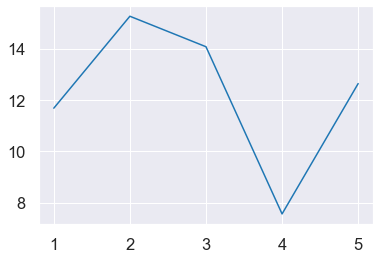

In [329]:
test = data.groupby(['var_10']).agg({'y':'mean'}).reset_index()
plt.plot(test['var_10'],test['y'])

In [330]:
#Creating a flag for knot
data['var_9_flag'] = np.where(data['var_9']>205000,1,0)

## Data Cleansing and Transformation

In [331]:
data_prep = data
data_prep.var_10.value_counts()

4    2086
5    2033
3    1989
2    1957
1    1935
Name: var_10, dtype: int64

In [332]:
#one hot key encoding aka dummies
data_prep['var_10'] = data_prep['var_10'].apply(str)
data_prep=pd.concat([data_prep, pd.get_dummies(data_prep['var_10'],prefix='var10')], axis=1)
data_prep.head()

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_2_log,v9_bins,var_9_flag,var10_1,var10_2,var10_3,var10_4,var10_5
0,58.891377,5285.076955,8102.610429,-142802.4627,0.731818,61045.686450,183502.7911,2418498.392,27880.60083,360626.7592,4,6.565230e+07,"(300000.0, 473752.798]",1,0,0,0,1,0
1,57.641838,2094.137183,7432.119245,-147434.0657,2.527586,48485.220290,232809.7287,1779351.332,32153.75776,382670.3624,5,5.523640e+07,"(300000.0, 473752.798]",1,0,0,0,0,1
2,53.746536,5830.245294,6613.941822,-129496.5961,2.625691,36301.747910,214837.0432,2072100.771,30642.70182,370120.6062,2,4.374423e+07,"(300000.0, 473752.798]",1,0,1,0,0,0
3,36.168986,13039.246420,5270.829420,-439972.8126,0.844833,-5909.877785,173613.1204,1899841.158,41311.52728,329891.8986,4,2.778164e+07,"(300000.0, 473752.798]",1,0,0,0,1,0
4,32.669772,4611.755026,3456.822275,-138594.7123,4.058533,37602.705370,228498.4096,1925463.972,27522.27266,473752.7977,3,1.194962e+07,"(300000.0, 473752.798]",1,0,0,1,0,0


In [333]:
data_prep.quantile([0, 0.01, 0.05,  0.5, 0.95, 0.99, 1])

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_2_log,var_9_flag,var10_1,var10_2,var10_3,var10_4,var10_5
0.00,-20.486397,-5583.153749,-6338.250221,-439972.812600,-1.328607,-77050.448580,-162312.422300,-2.692945e+06,-12674.425590,-135125.465700,6.121616e+00,0.0,0.0,0.0,0.0,0.0,0.0
0.01,-16.478872,236.054764,-2405.548363,-193249.208944,-0.196929,-26424.059550,-81922.382971,-8.950593e+05,-738.790778,-43089.559415,5.222560e+03,0.0,0.0,0.0,0.0,0.0,0.0
0.05,-11.724272,2622.140612,-730.390749,-83928.607522,0.288505,3707.091916,-33242.450199,-2.992506e+05,6110.451104,13905.641820,1.669600e+05,0.0,0.0,0.0,0.0,0.0,0.0
0.50,10.881019,8463.373285,3430.595022,167029.781400,1.598712,73543.761555,86582.980525,1.149984e+06,22091.102400,154089.232450,1.190768e+07,0.0,0.0,0.0,0.0,0.0,0.0
0.95,39.280340,14159.433173,7671.877726,423847.986075,2.927728,143178.675695,202673.935215,2.610264e+06,38272.024268,294033.712510,5.885771e+07,1.0,1.0,1.0,1.0,1.0,1.0
0.99,57.094613,16695.691803,9360.349888,531588.604970,3.464126,171733.368855,251770.325164,3.208818e+06,45247.230188,346752.611845,8.761615e+07,1.0,1.0,1.0,1.0,1.0,1.0
1.00,94.749833,23299.976630,12288.699000,857156.728100,4.639956,242913.447400,357758.526300,4.315470e+06,58807.189120,473752.797700,1.510121e+08,1.0,1.0,1.0,1.0,1.0,1.0


### Modeling Data

In [348]:
def model_metrics(y_true, y_pred):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score
    from scipy.stats import spearmanr, pearsonr
    
    r2_score = r2_score(y_true, y_pred)
    spearman = spearmanr(y_true, y_pred)[0]
    pearson = pearsonr(y_true, y_pred)[0]

    mae=mean_absolute_error(y_true, y_pred)
    mse=mean_squared_error(y_true, y_pred)
    rmse= np.sqrt(mse)
    median_abs_error=median_absolute_error(y_true, y_pred)
    exp_var_score=explained_variance_score(y_true, y_pred)

    print(f'Test data R-2 score: {r2_score:>5.3}')
    print(f'Test data Spearman correlation: {spearman:.3}')
    print(f'Test data Pearson correlation: {pearson:.3}')
    print('Test data Mean Absolute Error:', round(mae,3))
    print('Test data Mean Squared Error:', round(mse,3))
    print('Test data Root Mean Squared Error:', round(rmse,3))
    print('Test data Median Absolute Error:', round(median_abs_error,3))
    print('Test data Explained Variance Score:', round(exp_var_score,3))
    
    results_list=[r2_score, spearman, pearson, mae, mse, rmse, median_abs_error, exp_var_score]
    return results_list

In [335]:
def visualize_feature_importance(features, model):

    #make picture
    sns.set_style('darkgrid')
    sns.set_context("notebook", font_scale=1.5)
    plt.figure(figsize=(16,16))
    # Creating a bar plot
    ax=sns.barplot(x=features, y=features.index)
    
    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+ 0.01, i.get_y()+0.5, \
                str(round((i.get_width()), 4)), fontsize=17, color='black')
    
    
    # Add labels to your graph
    feature_title='Visualizing Important Features for ' + model
    ax.set_title(feature_title, fontsize=30)
    ax.set_xlabel("Feature Importance Score", fontsize=20)
    ax.set_ylabel("Features", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.tight_layout()

In [336]:
def make_scatterplot(y_true, y_pred, model_name):
    # for dashed lines
    x=np.linspace(data_prep.y.min(),data_prep.y.max(),100)
    y=x
    # customize a title
    plot_title='Actual vs Predicted Balances for ' + model_name
    
    # make figure
    plt.figure(figsize=(10,10))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot(x,y, '-.r', label='line of perfect prediction')

    plt.title(plot_title, fontsize=20)
    plt.xlabel('Actual Balance', fontsize=18)
    plt.ylabel('Predicted Balance', fontsize=18)
    plt.tight_layout()
    plt.legend()

In [338]:
data_prep.columns

Index(['y', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9', 'var_10', 'var_2_log', 'v9_bins', 'var_9_flag',
       'var10_1', 'var10_2', 'var10_3', 'var10_4', 'var10_5'],
      dtype='object')

In [339]:
x_continous = data_prep[['var_1','var_2_log','var_3','var_4','var_6','var_7','var_8','var_9']]
x_dummies = data_prep[['var10_1','var10_2','var10_3','var10_4','var10_5','var_9_flag']]
y=data_prep['y']

#### Preprocessed the Data - Standard Scaler

In [340]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
standard_scaler = StandardScaler()
standard_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [341]:
x_continous[['var_1','var_2_log','var_3','var_4','var_6','var_7','var_8','var_9']]=standard_scaler.fit_transform(x_continous)
x_continous.head()

,var_1,var_2_log,var_3,var_4,var_6,var_7,var_8,var_9
0,-0.892847,2.381823,-2.013650,-1.099503,1.363607,1.434222,0.578613,2.442256
1,-1.794184,1.857035,-2.043608,1.147533,2.052285,0.711211,1.013108,2.702630
2,-0.738855,1.278020,-1.927583,1.270291,1.801258,1.042372,0.859464,2.554395
3,1.297453,0.473770,-3.935850,-0.958088,1.225476,0.847510,1.944270,2.079222
4,-1.083039,-0.323901,-1.986432,3.063199,1.992068,0.876495,0.542179,3.778476


In [342]:
x=pd.concat([x_continous, x_dummies], axis=1)
x.head()

,var_1,var_2_log,var_3,var_4,var_6,var_7,var_8,var_9,var10_1,var10_2,var10_3,var10_4,var10_5,var_9_flag
0,-0.892847,2.381823,-2.013650,-1.099503,1.363607,1.434222,0.578613,2.442256,0,0,0,1,0,1
1,-1.794184,1.857035,-2.043608,1.147533,2.052285,0.711211,1.013108,2.702630,0,0,0,0,1,1
2,-0.738855,1.278020,-1.927583,1.270291,1.801258,1.042372,0.859464,2.554395,0,1,0,0,0,1
3,1.297453,0.473770,-3.935850,-0.958088,1.225476,0.847510,1.944270,2.079222,0,0,0,1,0,1
4,-1.083039,-0.323901,-1.986432,3.063199,1.992068,0.876495,0.542179,3.778476,0,0,1,0,0,1


In [349]:
from sklearn.model_selection import train_test_split

# X and Y previously defined 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=59)

In [350]:
X_train.head()

,var_1,var_2_log,var_3,var_4,var_6,var_7,var_8,var_9,var10_1,var10_2,var10_3,var10_4,var10_5,var_9_flag
7395,0.635806,1.757470,0.022488,-0.655774,0.528699,-0.734267,1.554706,-2.367398,0,0,1,0,0,0
1705,-0.604814,2.657332,-0.213805,0.649276,0.181887,-0.998401,1.747874,-0.725248,0,1,0,0,0,0
4577,-0.321665,0.952462,-1.094277,-0.132972,-0.986812,-0.729540,2.190404,-1.446923,0,0,0,1,0,0
8799,0.443865,-0.600611,1.023777,-0.579836,-0.617897,0.292074,-1.547651,-0.745113,0,0,1,0,0,0
5537,-0.736367,-0.342099,-0.673929,-0.739888,0.186500,-3.050258,-1.589715,-0.397632,0,0,0,1,0,0


### Linear Regression

In [351]:
#run first linear regression
from sklearn.linear_model import LinearRegression
# instantiate the model with the solver defined even if this is the default 
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)


lin_preds = linmodel.predict(X_test)

In [352]:
print(linmodel.coef_)
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(linmodel.coef_))], axis = 1)
coefficients

[-3.93605329e-01  1.16133913e+01 -7.00075950e+00 -1.07885130e-02
  2.93495869e-01  4.49457587e-01 -1.69457123e-03  6.02340097e+00
 -5.69249306e-01  3.42536391e+00  1.46036378e+00 -4.65546580e+00
  3.38987406e-01  2.62454607e+00]


,0,0
0,var_1,-0.393605
1,var_2_log,11.613391
2,var_3,-7.000759
3,var_4,-0.010789
4,var_6,0.293496
5,var_7,0.449458
6,var_8,-0.001695
7,var_9,6.023401
8,var10_1,-0.569249
9,var10_2,3.425364


In [353]:
linear_metrics=model_metrics(y_test, lin_preds)

Test data R-2 score: 0.893
Test data Spearman correlation: 0.943
Test data Pearson correlation: 0.945
Test data Mean Absolute Error: 4.119
Test data Mean Squared Error: 26.515
Test data Root Mean Squared Error: 5.149
Test data Median Absolute Error: 3.54
Test data Explained Variance Score: 0.893


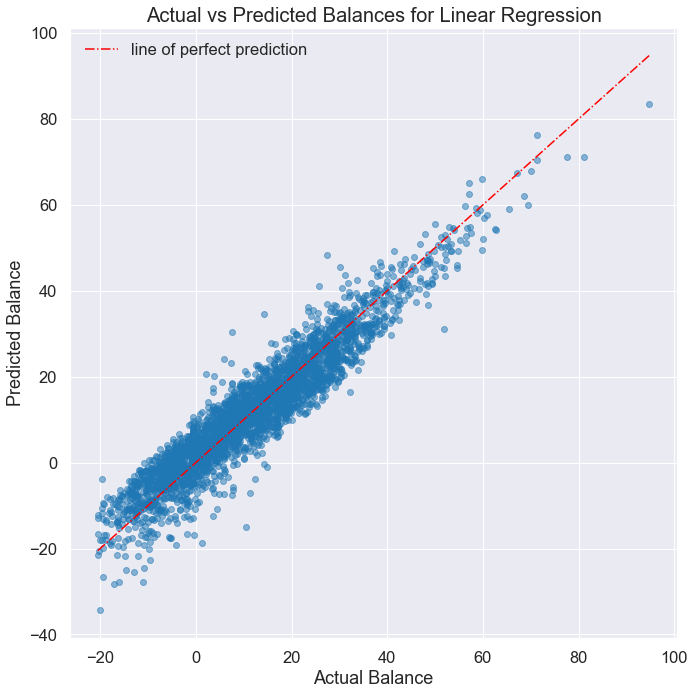

In [375]:
ax=make_scatterplot(y_test, lin_preds, 'Linear Regression')
plt.savefig('actual_v_pred_linear.png')

In [379]:
from sklearn.model_selection import cross_val_score, cross_val_predict
def cross_validation(model,test, pred):
    cv_mae = cross_val_score(model, test, pred, cv=5, scoring='neg_mean_absolute_error')
    cv_scores = cross_val_score(model, test, pred, cv=5)
    cv_nmse = cross_val_score(model, test, pred, cv=5, scoring='neg_mean_squared_error')
    cross_score=pd.Series(cv_scores)
    df = pd.DataFrame()
    df['Cross_Score'] = cross_score
    df['MSE'] = cv_nmse
    df['MAE'] = cv_mae
    return df

In [380]:
cross_validation(linmodel,x,y)


,Cross_Score,MSE,MAE
0,0.785937,-30.600583,-4.469470
1,0.530189,-26.850964,-4.231115
2,0.534736,-24.194986,-3.996424
3,0.602904,-26.787212,-4.290633
4,0.271967,-50.962259,-5.461444


### Linear Regression Lasso

In [361]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1)

lassoReg.fit(X_train, y_train)

pred = lassoReg.predict(X_test)

In [362]:
##Coefficients
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lassoReg.coef_))], axis = 1)
coefficients

,0,0
0,var_1,-0.119110
1,var_2_log,11.654258
2,var_3,-6.813989
3,var_4,-0.000000
4,var_6,0.205910
5,var_7,0.129225
6,var_8,0.000000
7,var_9,6.446248
8,var10_1,-0.395172
9,var10_2,2.562505


In [364]:
linear_metrics=model_metrics(y_test, pred)

Test data R-2 score: 0.891
Test data Spearman correlation: 0.943
Test data Pearson correlation: 0.944
Test data Mean Absolute Error: 4.151
Test data Mean Squared Error: 26.907
Test data Root Mean Squared Error: 5.187
Test data Median Absolute Error: 3.564
Test data Explained Variance Score: 0.891


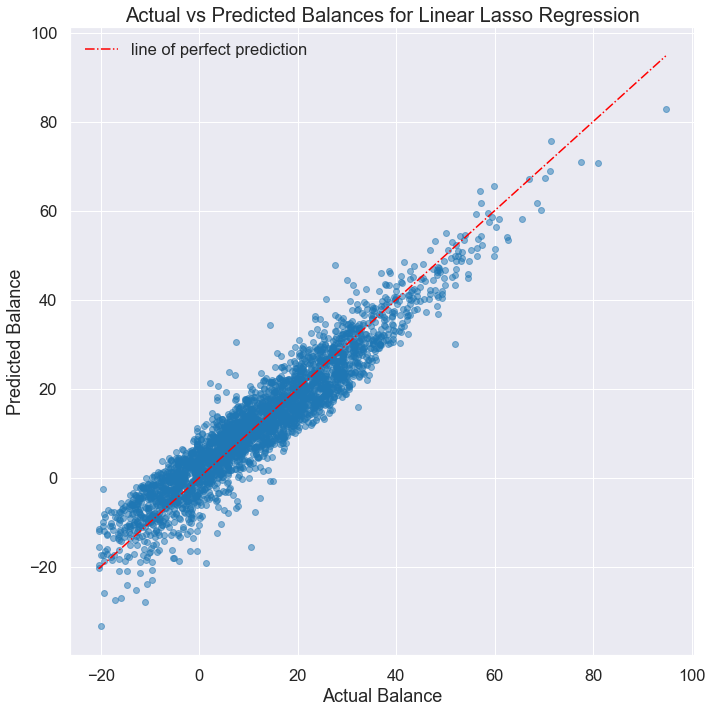

In [365]:
ax=make_scatterplot(y_test, pred, 'Linear Lasso Regression')

In [366]:
cross_validation(lassoReg,x,y)

,Cross_Score,MSE,MAE
0,0.766831,-33.331734,-4.708817
1,0.530155,-26.852906,-4.242976
2,0.540942,-23.872269,-3.971170
3,0.599083,-27.045001,-4.301071
4,0.282591,-50.218616,-5.464599


### RandomForest Regressor 

In [367]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
#min_samples_leaf=25
rf.fit(X_train, y_train)
ypred_train = rf.predict(X_train)
ypred_test = rf.predict(X_test)
rf_feature_imp = pd.Series(rf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
oob_score=rf.oob_score_

In [368]:
oob_score=rf.oob_score_
oob_score

0.9896307846513749

In [369]:
rf_feature_imp

var_2_log     0.407060
var_3         0.375835
var_9         0.189892
var10_4       0.015873
var10_2       0.003124
var_6         0.002474
var_7         0.001187
var_4         0.001159
var_8         0.001153
var_1         0.001078
var10_1       0.000594
var10_3       0.000330
var10_5       0.000153
var_9_flag    0.000090
dtype: float64

In [370]:
rfr_metrics=model_metrics(y_test, ypred_test)

Test data R-2 score: 0.989
Test data Spearman correlation: 0.995
Test data Pearson correlation: 0.994
Test data Mean Absolute Error: 1.004
Test data Mean Squared Error: 2.758
Test data Root Mean Squared Error: 1.661
Test data Median Absolute Error: 0.632
Test data Explained Variance Score: 0.989


In [371]:
rfr_metrics

[0.9888448429449475,
 0.9952044183352938,
 0.994432260787099,
 1.0039025735555709,
 2.75812092243606,
 1.6607591404041888,
 0.6317945730699983,
 0.9888548113218033]

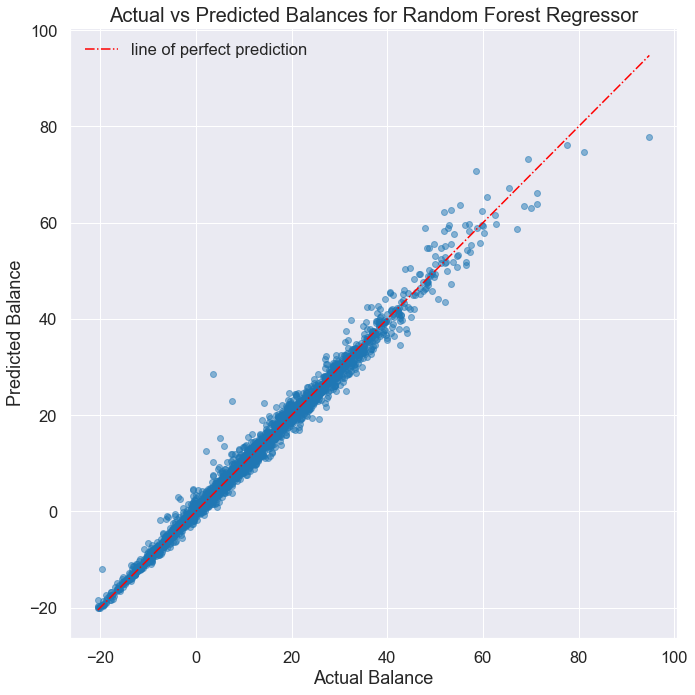

In [376]:
ax=make_scatterplot(y_test, ypred_test, 'Random Forest Regressor')
plt.savefig('actual_v_pred_rfr.png')

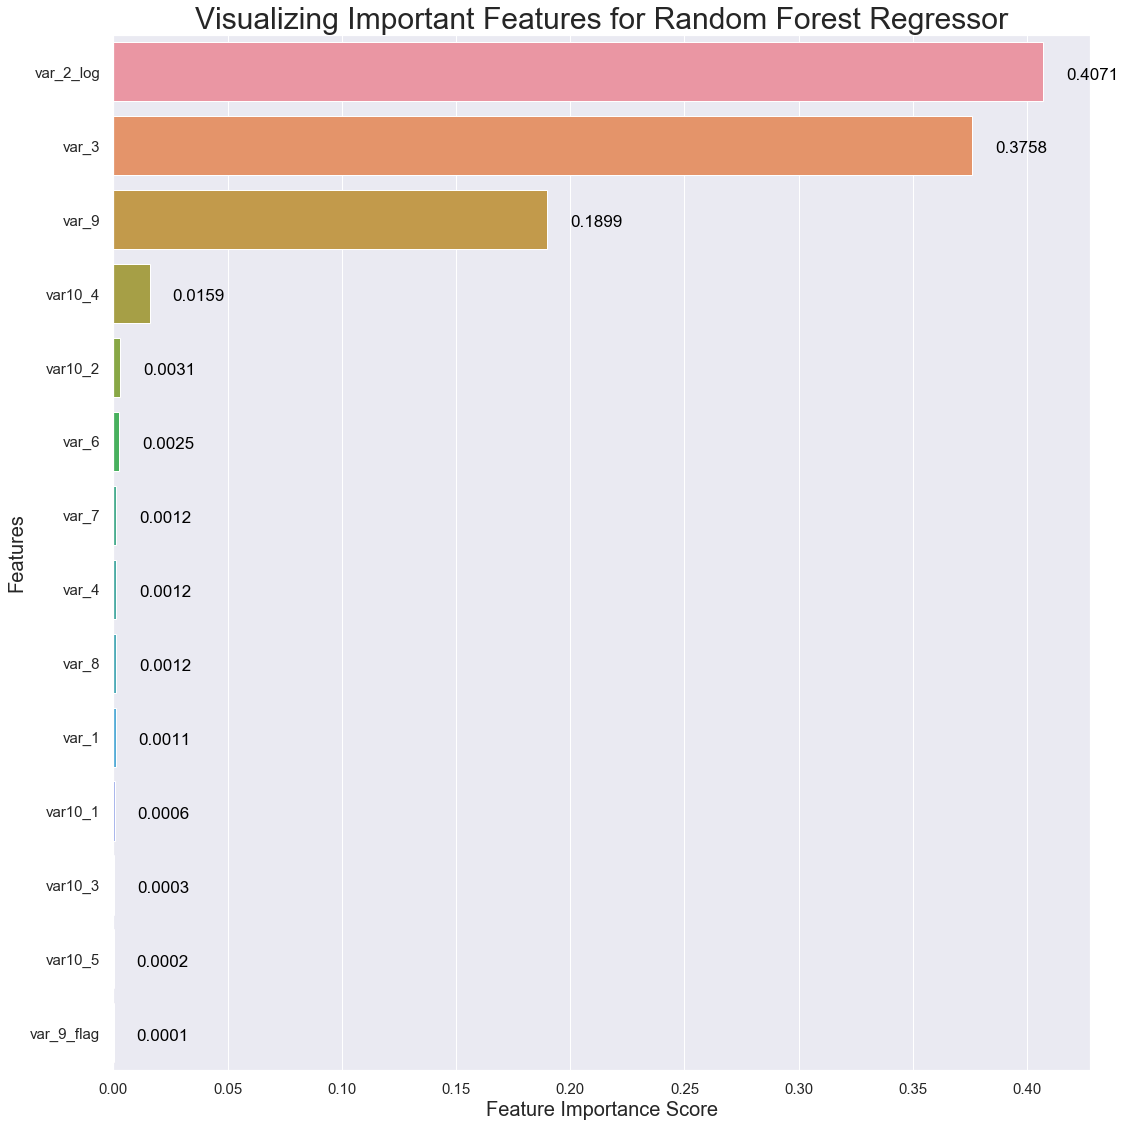

In [373]:
ax=visualize_feature_importance(rf_feature_imp, 'Random Forest Regressor')

In [374]:
cross_validation(rf,x,y)

,Cross_Score,MSE,MAE
0,0.266719,-104.823445,-7.049031
1,0.900791,-5.670047,-1.694471
2,0.938177,-3.214940,-1.329733
3,0.967628,-2.183773,-1.050620
4,0.868157,-9.228988,-2.167721
